## 시계열 다루기

Pandas는 금융 모델링을 위해 개발돼 예상대로 날짜, 시간, 시간 인덱스를 가진 데이터를 다루는 매우 다양한 도구를 가지고 있음

날짜와 시간 데이터의 종류
+ ``타임스태프`` : 특정 시점 (예, 2015년 6월 4일 오전 7시)
+ ``시간 간격``과 ``기간`` : 특정 시작점과 종료점 사이의 시간의 길이 (예:2015년 or 하루를 구성하는 24시간)
+ ``시간 델타`` 나 ``지속 기간`` : 정확한 시간 길이 (예: 22.56초의 시간)

### 기본 파이썬 날짜와 시간 : datetime & dateutil

제3자 모듈인 dateutil과 함께 dateitme 모듈을 사용해 날짜와 시간에 여러 가지 유용한 기능을 신속하게 수행할 수 있음

In [15]:
#datetime 타입을 사용해 날짜를 직접 구성
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [ ]:
#dateutil 을 이용해 다양한 문자열 형태로부터 날짜를 해석
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
#datetime 객체를 갖고 나면 요일을 출력하는 등의 작업 가능
date.strftime('%A')

'Saturday'

### 타입이 지정된 시간 배열 : NumPy의 datetime64

datetime64 dtype은 날짜를 64비트 정수로 인코딩해 날짜 배열ㅇ르 매우 간결하게 표현하게 해준다. datetime64는 매우 구체적인 입력 형식이 필요.

In [5]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [10]:
#날짜 포맷이 정해지고 나면 거기에 벡터화된 연산을 빠르게 수행 가능
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [11]:
#하루 단위의 datetime
np.datetime64('2015-07-04')

np.datetime64('2015-07-04')

In [12]:
#분 단위의 datetime
np.datetime64('2015-07-04 12:00')

np.datetime64('2015-07-04T12:00')

In [13]:
#다양한 포맷 코드 중 하나를 사용해 원하는 기본 단위를 정할 수 있음
#예를 들면, 다음은 시간의 단위를 나노초로 정한 것
np.datetime64('2015-07-04 12:59:59.50', 'ns')

np.datetime64('2015-07-04T12:59:59.500000000')

#### Pandas에서의 날짜와 시간

datetime과 dateutil의 사용 편의성과 numpy.datetime64의 효율적인 저장소와 벡터화된 인터페이스를 결합한 것

In [13]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

#다양한 포맷을 사용하는 문자열 날짜 데이터를 해석 가능

Timestamp('2015-07-04 00:00:00')

In [3]:
#포맷 코드를 이용해 요일 출력 가능
date.strftime('%A')

'Saturday'

In [6]:
#Numpy스타일의 벡터화된 연산을 직접 수행도 가능
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas 시계열 : 시간으로 인덱싱하기

Pandas 시계열 도구는 실제로 타임스탬프로 데이터를 인덱싱할 때 아주 유용하다. 예를 들어, 시간 인덱스를 가진 데이터의 Series 객체를 구성할 수 있다.

In [10]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [8]:
#이 경우 날짜로 변환될 수 있는 값을 전달해 인덱싱 패턴에 사용 가능
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [9]:
# 그 밖에도 해당 연도의 모든 데이터 슬라이슬를 얻기 위해 
# 연도를 전달하는 것과 같은 특별한 날짜 전용 인덱싱도 연산도 있음
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas 시계열 데이터 구조

``타임스탬프(Time stamp)`` : 파이썬의 기본 datetime의 대체 타입이지만 좀 더 효율적인 numpy.datetime64 데이터 타입을 기반으로 한다. 관련 인덱스 구조는 DatetimeIndex 다.

``기간(time period)`` : numpy.datetime64를 기반으로 고정 주파수 간격을 인코딩 한다. 관련 인덱스 구조는 PeriodIndex 이다.

``시간 델타`` 또는 ``지속 시간 (Timedelta)`` : 파이썬의  기본 datetime.timedelta 타입의 좀 더 효율적인 대체 타입이며, numpy.timedelta64를 기반으로 함. 관련 인덱스 구조는 TimedeltaIndex 이다. 

pd.to_datetime()에 단일 날짜를 전달하면 Timestamp를, 일련의 날짜를 전달하면 DatetimeIndex를 생성

In [16]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

DatetimeIndex는 to_period()함수에 주기 코드를 추가해 PeriodIndex로 전환 가능

In [17]:
# D : 일별 주기
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

예를 들어, 어떤 날짜에서 다른 날짜를 빼면 TimedeltaIndex가 생성됨

In [18]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### 정규 시퀀스 : ``pd.date_range()``

In [ ]:
#시작일, 종료일 지정
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
#시작일, 기간의 수로 지정
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
#freq인수 바꿔서 지정 (시간단위)
pd.date_range('2015-07-03', periods=8, freq='H')

C:\Users\user\AppData\Local\Temp\ipykernel_15124\2195788547.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

## 예제: 시애틀 자전거 수 시각화

curl: 웹에서 데이터를 다운로드하거나 서버와 통신하기 위한 명령어


-o FremontBridge.csv: 다운로드한 데이터를 FremontBridge.csv라는 이름의 파일로 저장하겠다(-o : output의 약자)

In [ ]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  687k    0  687k    0     0   242k      0 --:--:--  0:00:02 --:--:--  242k
100 3271k    0 3271k    0     0   905k      0 --:--:--  0:00:03 --:--:--  905k


Pandas를 사용해 DataFrame으로 읽어들이기 -> 인덱스로 Date사용

In [31]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15124\107446932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


열이름바꾸기

In [32]:
# data.columns = ['West', 'East']
# data['Total'] = data.eval('West + East')
data.columns = ['Total', 'West', 'East']

요약통계살펴보기

In [37]:
data.shape

(105144, 3)

In [39]:
data.dropna().shape

(105116, 3)

In [38]:
data.dropna().describe()

,Total,West,East
count,105116.000000,105116.000000,105116.000000
mean,106.545569,45.701967,60.843601
std,132.098939,59.570117,82.227507
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,60.000000,26.000000,32.000000
75%,146.000000,63.000000,80.000000
max,1097.000000,667.000000,850.000000


### 데이터 시각화

원시 데이터를 그래프로

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

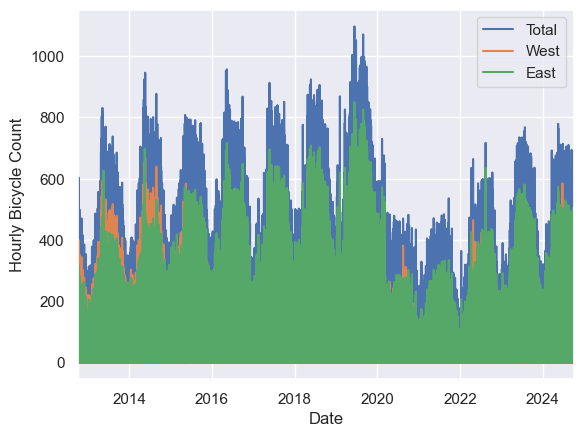

In [43]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

주 단위로 리샘플링

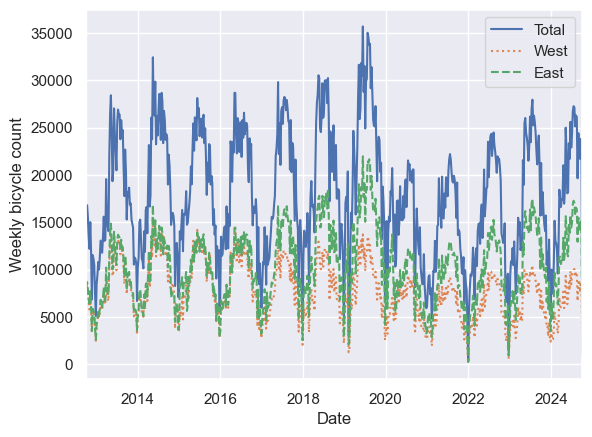

In [45]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicycle count');